In [46]:
import networkx as nx
import pandas as pd

In [47]:
# load data
posn_df = pd.read_csv('../data/posn_df.csv')
emp_df = pd.read_csv('../data/emp_df.csv')
rpt_df = pd.read_csv('../data/rpt_df.csv')

In [48]:
G = nx.from_pandas_edgelist(rpt_df, source='source', target='target', edge_attr='type')

In [49]:
G.number_of_nodes()

1007

In [50]:
# importing and setting seed for random and np.random did not help make the graph shape deterministic
# using pos=nx.kamada_kawai_layout() helped with getting accurate layout and shape
pos = nx.kamada_kawai_layout(G)

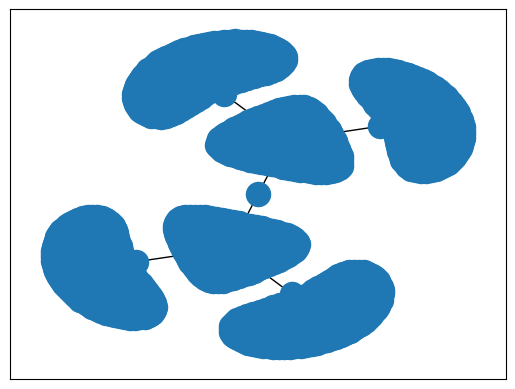

In [51]:
nx.draw_networkx(G, with_labels=False, pos=pos)

In [52]:
# add position/node attributes; first convert df to a dictionary
posn_attr = posn_df.set_index('posn_id').to_dict('index')
# posn_attr

In [53]:
nx.set_node_attributes(G, posn_attr)

In [54]:
G.nodes['P001101']

{'posn_type': 'Supervisor',
 'city': 'Chicago',
 'dept': 'Logistics',
 'div': 'L1'}

In [55]:
# write json formatted graph data for visualization with d3
import json
d = nx.json_graph.node_link_data(G)  # node-link format to serialize
json.dump(d, open("../data/network_vis.json", "w"))